In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy.stats import norm
# might be needed depending on your version of Jupyter
%matplotlib inline

In [3]:
df = pd.read_csv('../Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdN2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79392 entries, 0 to 79391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UWI         79392 non-null  object
 1   START_DATE  79392 non-null  object
 2   OIL         79392 non-null  int64 
 3   GAS         79392 non-null  int64 
 4   WATER       79392 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


In [5]:
df.isnull().sum()

UWI           0
START_DATE    0
OIL           0
GAS           0
WATER         0
dtype: int64

In [6]:
df.head()

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0


In [7]:
df

,UWI,START_DATE,OIL,GAS,WATER
0,BR819,1965-05-01,1785,0,0
1,AB257,1973-11-01,26550,22470,0
2,TR758,1973-11-01,122600,112100,0
3,ON369,1973-11-01,65134,36450,0
4,DS652,1973-11-01,61277,60180,0
...,...,...,...,...,...
79387,RK103,2018-06-01,39467,44068,0
79388,TR855,2018-06-01,38581,44513,31049
79389,BR477,2018-06-01,5740,4052,434
79390,RK301,2018-06-01,0,0,0


In [8]:
df.corr()['OIL'].sort_values()

WATER   -0.077144
GAS      0.959902
OIL      1.000000
Name: OIL, dtype: float64

In [9]:
df.corr()['GAS'].sort_values()

WATER   -0.049226
OIL      0.959902
GAS      1.000000
Name: GAS, dtype: float64

In [10]:
df.corr()['WATER'].sort_values()

OIL     -0.077144
GAS     -0.049226
WATER    1.000000
Name: WATER, dtype: float64

In [11]:
df.corr()

,OIL,GAS,WATER
OIL,1.000000,0.959902,-0.077144
GAS,0.959902,1.000000,-0.049226
WATER,-0.077144,-0.049226,1.000000


In [12]:
from datetime import datetime
import statsmodels.api as sm

In [13]:
df.set_index('START_DATE',inplace=True)

In [14]:
df

,UWI,OIL,GAS,WATER
START_DATE,,,,
1965-05-01,BR819,1785,0,0
1973-11-01,AB257,26550,22470,0
1973-11-01,TR758,122600,112100,0
1973-11-01,ON369,65134,36450,0
1973-11-01,DS652,61277,60180,0
...,...,...,...,...
2018-06-01,RK103,39467,44068,0
2018-06-01,TR855,38581,44513,31049
2018-06-01,BR477,5740,4052,434


In [15]:
df = df.drop('WATER',axis=1)

In [16]:
df = df.drop('UWI',axis=1)

In [17]:
df = df.drop('GAS',axis=1)

In [18]:
df

,OIL
START_DATE,
1965-05-01,1785
1973-11-01,26550
1973-11-01,122600
1973-11-01,65134
1973-11-01,61277
...,...
2018-06-01,39467
2018-06-01,38581
2018-06-01,5740


In [19]:
from scipy import stats
import statsmodels.api as sm

In [20]:
df=df.replace(0, np.nan)

In [21]:
df=df.replace(0, np.nan).dropna(subset=["OIL"], how="all")

In [22]:
df

,OIL
START_DATE,
1965-05-01,1785.0
1973-11-01,26550.0
1973-11-01,122600.0
1973-11-01,65134.0
1973-11-01,61277.0
...,...
2018-06-01,41652.0
2018-06-01,47494.0
2018-06-01,39467.0


In [23]:
log_returns=np.log(1+df.pct_change())
log_returns

,OIL
START_DATE,
1965-05-01,NaN
1973-11-01,2.699611
1973-11-01,1.529897
1973-11-01,-0.632480
1973-11-01,-0.061042
...,...
2018-06-01,0.111107
2018-06-01,0.131254
2018-06-01,-0.185139


In [24]:
#log_returns=log_returns.replace([np.inf, -np.inf], np.nan)

In [25]:
#df=df.dropna(subset=["OIL"], how="all")

In [26]:
log_returns

,OIL
START_DATE,
1965-05-01,NaN
1973-11-01,2.699611
1973-11-01,1.529897
1973-11-01,-0.632480
1973-11-01,-0.061042
...,...
2018-06-01,0.111107
2018-06-01,0.131254
2018-06-01,-0.185139


In [27]:
stdev=np.sqrt(log_returns.std()*365)
stdev

OIL    19.67693
dtype: float64

In [28]:
stdev=stdev.values
stdev

array([19.6769303])

In [29]:
T=1
t_intervals=1000
delta_T=T/t_intervals
iterations=10

In [30]:
Z=np.random.standard_normal((t_intervals+1,iterations))
S=np.zeros_like(Z)
S0=df.iloc[-1]
S[0]=S0

In [31]:
r=0.025

In [32]:
for t in range(1,t_intervals+1):
    S[t]=S[t-1]*np.exp(((r-(0.5*pow(stdev,2)))*delta_T)+(stdev*Z[t]*(np.sqrt(delta_T))))

In [33]:
S

array([[5.74000000e+03, 5.74000000e+03, 5.74000000e+03, ...,
        5.74000000e+03, 5.74000000e+03, 5.74000000e+03],
       [6.49821881e+03, 9.44537939e+02, 3.10507257e+03, ...,
        5.85213514e+03, 4.34736724e+03, 3.57586926e+03],
       [1.41638850e+04, 4.42118352e+02, 2.19774081e+03, ...,
        6.86530704e+03, 3.43979690e+03, 7.47139863e+03],
       ...,
       [1.13916914e-84, 1.65977666e-78, 4.33748680e-70, ...,
        1.59116408e-68, 6.61718404e-86, 4.38617755e-98],
       [1.35860535e-84, 2.09247514e-78, 4.20523570e-70, ...,
        1.22467102e-68, 4.49739208e-86, 1.71825524e-98],
       [2.28925560e-84, 2.03630558e-78, 1.46439086e-70, ...,
        9.51651512e-69, 3.72967522e-86, 8.25948640e-99]])

In [34]:
S.shape

(1001, 10)

(0, 50)

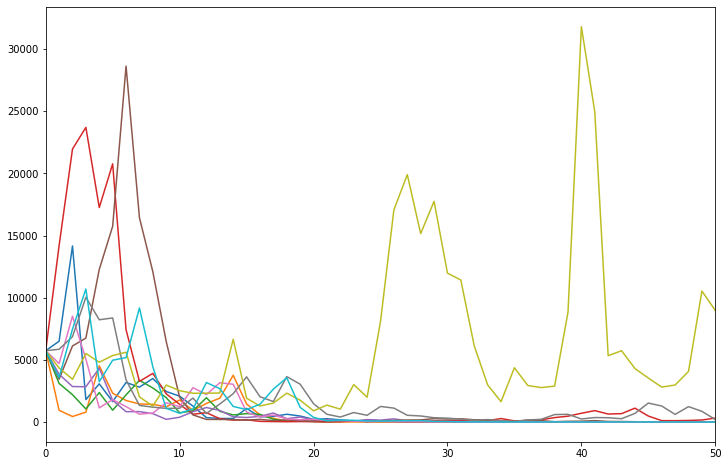

In [35]:
plt.figure(figsize=(12,8));
#plt.plot(S[:,:50]);
plt.plot(S);
plt.xlim(left=0,right=50)